In [2]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def color_string(order, s : str):
    if order in [6, 8]:
        return bcolors.FAIL + s + bcolors.ENDC
    else:
        return s

In [6]:
from typing import List
from enum import Enum

class ResourceType(Enum):
    Tree = 1
    Grain = 2
    Steal = 3
    Sheep = 4
    Ground = 5
    Sea = 6
    UnCharted = 7
    OutOfRange = 8
    
class Gift:
    odds = {
        -1 : 0,
        2 : 1,
        3 : 2,
        4 : 3,
        5 : 4,
        6 : 5,
        8 : 5,
        9 : 4,
        10 : 3,
        11 : 2,
        12 : 1
    }
    
    def __init__(self, number: int=-1, type: ResourceType=ResourceType.OutOfRange):
        assert(number in Gift.odds.keys())
        
        self.number = number
        self.type = type
        self.neighbors : List[Gift] = []
        self.harbors : List[ResourceType] = []
    

In [7]:
from re import I
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np

class Board:
    radius = np.sqrt(1/3)
    def __init__(self, size: int):
        assert(size % 2 != 0)
        self.size = size
        self.gifts = {}
        self.corners = {}    
        
        self.__initialize_hex_map__()
        
    def __initialize_hex_map__(self) -> None:
        centroids = []
        for i in range(self.size//2+1):
            s, y = self.size - i, i * 3/2 * Board.radius
            
            start_x = -(self.size//2 + 0.5)
            if i > 0:
                start_x = centroids[-1][0]
            
            if i % 2 == 0:
                for i in range(s):
                    x = start_x + 0.5 + i
                    centroids.append((x, y))
                    if y != 0:
                        centroids.append((x, -y))
            else:
                for i in range(s):
                    x = start_x - 0.5 - i
                    centroids.append((x, y))
                    if y != 0:
                        centroids.append((x, -y))

        for x, y in centroids:
            self.gifts[(x, y)] = Gift()
        return None
    
    def draw(self):
        fig, ax = plt.subplots(1)
        ax.set_aspect('equal')

        for x, y in self.gifts.keys():
            hex = RegularPolygon((x, y), numVertices=6, radius=Board.radius, alpha=1, edgecolor='k')
            ax.add_patch(hex)
            
        plt.autoscale(enable = True)
        plt.show()

    def generate(self):
        pass
    
class FogIsland(Board):
    def __init__(self):
        pass
    
    def generate(self):
        pass

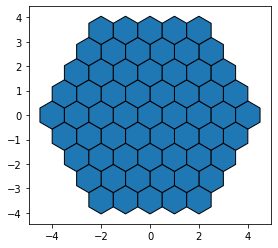

In [10]:
catan = Board(7)
catan.draw()